# Data Exploration 

## Set-Up

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os

In [30]:
# Set the main path
main_path = '/Users/posmikdc/Documents/brown/classes/year2/fall25/csci2952g-dlgenomics/csci2952g-paper'
data_path = os.path.join(main_path, 'data/sample_data')

# Define data and file objects
data = {}
files = [
    'sample_fullnet_full.txt',
    'sample_fullnet_score.txt',
    'sample_fullnet_subscore.txt'
]

# Read in files; separate by space
for file in files:
    file_path = os.path.join(data_path, file)
    key = file.replace('.txt', '')
    data[key] = pd.read_csv(file_path, delim_whitespace=True)
    print(f"Loaded {file}: {data[key].shape}")

# Check the result
data['sample_fullnet_full'].head()

/var/folders/hw/h_ytc0w90js5pz0zw2dz9p440000gn/T/ipykernel_4418/1200029800.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[key] = pd.read_csv(file_path, delim_whitespace=True)
/var/folders/hw/h_ytc0w90js5pz0zw2dz9p440000gn/T/ipykernel_4418/1200029800.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[key] = pd.read_csv(file_path, delim_whitespace=True)
/var/folders/hw/h_ytc0w90js5pz0zw2dz9p440000gn/T/ipykernel_4418/1200029800.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[key] = pd.read_csv(file_path, delim_whitespace=True)


Loaded sample_fullnet_full.txt: (329614, 16)
Loaded sample_fullnet_score.txt: (329614, 3)
Loaded sample_fullnet_subscore.txt: (329614, 10)


,protein1,protein2,neighborhood,neighborhood_transferred,fusion,cooccurence,homology,coexpression,coexpression_transferred,experiments,experiments_transferred,database,database_transferred,textmining,textmining_transferred,combined_score
0,208964.PA0001,208964.PA2748,0,0,0,0,0,0,66,0,0,0,0,0,131,153
1,208964.PA0001,208964.PA2977,0,0,0,0,0,0,0,0,0,0,0,83,207,241
2,208964.PA0001,208964.PA4730,0,105,0,0,0,0,0,0,0,0,0,0,132,189
3,208964.PA0001,208964.PA4983,0,0,0,152,0,0,0,0,0,0,0,0,83,189
4,208964.PA0001,208964.PA4277,0,0,0,0,0,0,61,0,0,0,0,95,147,211


## Visualization of High-Interaction and Low-Interaction Proteins

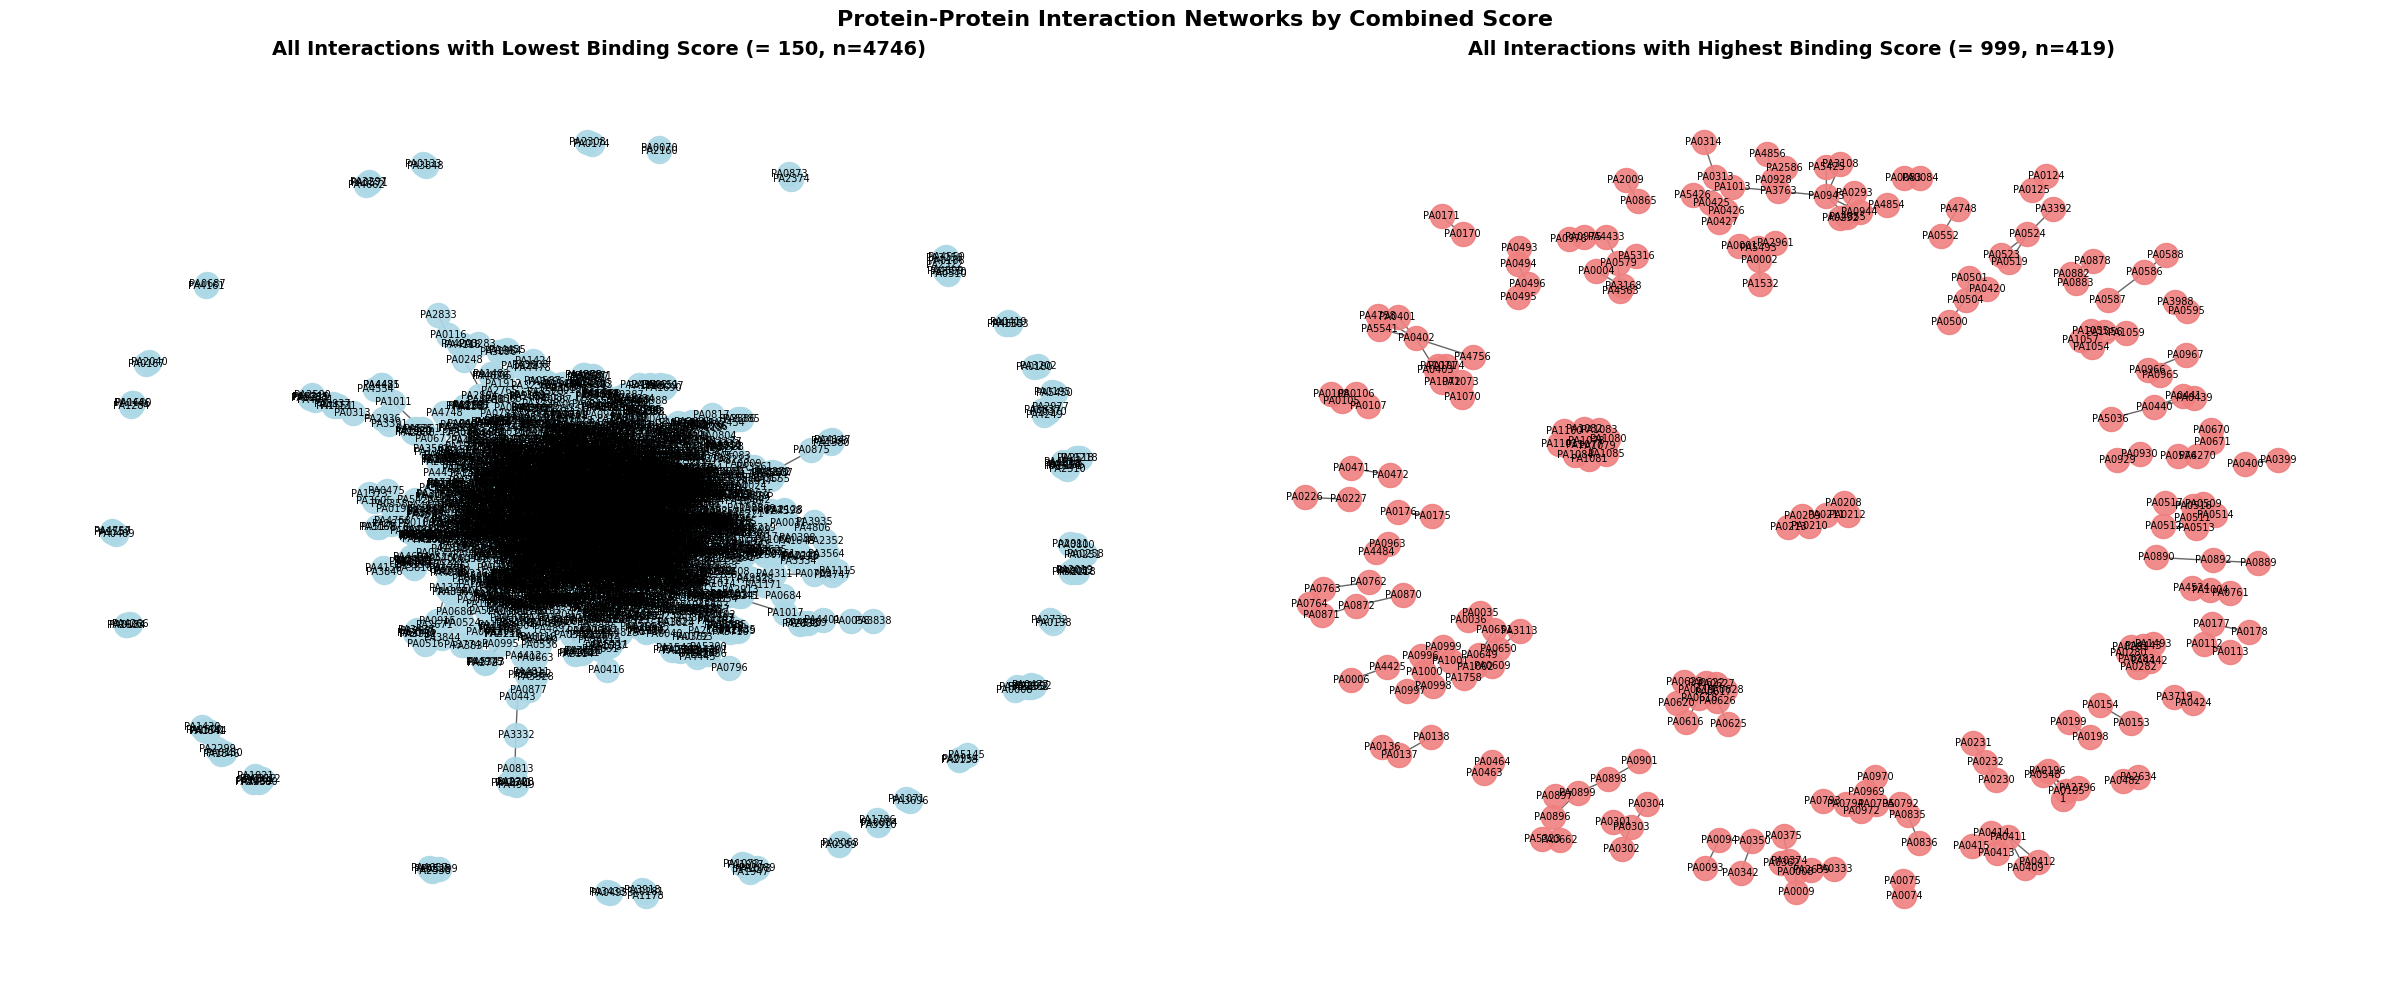

SCORE 150 INTERACTIONS:
Number of interactions: 4746
Number of unique proteins: 3256
Number of edges: 4315

First 5 interactions with score 150:
     protein1      protein2  combined_score
208964.PA0001 208964.PA0903             150
208964.PA0001 208964.PA2230             150
208964.PA0001 208964.PA1974             150
208964.PA0001 208964.PA3965             150
208964.PA0001 208964.PA5117             150

SCORE 999 INTERACTIONS:
Number of interactions: 419
Number of unique proteins: 240
Number of edges: 245

First 5 interactions with score 999:
     protein1      protein2  combined_score
208964.PA0001 208964.PA0002             999
208964.PA0002 208964.PA1532             999
208964.PA0002 208964.PA5493             999
208964.PA0002 208964.PA2961             999
208964.PA0002 208964.PA0001             999

SCORE DISTRIBUTION:
Unique score values: 850
Score 150 frequency: 4746
Score 999 frequency: 419


In [33]:
# Get the data
df = data['sample_fullnet_full']

# Get all interactions with score 150 and 999
score_150 = df[df['combined_score'] == 150][['protein1', 'protein2', 'combined_score']]
score_999 = df[df['combined_score'] == 999][['protein1', 'protein2', 'combined_score']]

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

# Function to create and draw network
def draw_network(data, ax, title, node_color):
    G = nx.Graph()
    
    # Add edges with weights
    for _, row in data.iterrows():
        G.add_edge(row['protein1'], row['protein2'], weight=row['combined_score'])
    
    # Calculate layout
    pos = nx.spring_layout(G, k=1, iterations=50, seed=42)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color=node_color, alpha=0.9, ax=ax)
    
    # Draw edges with varying thickness
    edges = G.edges()
    weights = [G[u][v]['weight'] for u, v in edges]
    max_weight = max(weights) if weights else 1
    min_weight = min(weights) if weights else 0
    if max_weight > min_weight:
        edge_widths = [3 * (w - min_weight) / (max_weight - min_weight) + 0.5 for w in weights]
    else:
        edge_widths = [1 for w in weights]
    
    nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.6, ax=ax)
    
    # Draw labels - shorten protein names
    labels = {node: node.split('.')[-1] for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=7, ax=ax)
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.axis('off')
    
    return G, weights

# Draw score 150 network
G1, weights1 = draw_network(score_150, ax1, f'All Interactions with Lowest Binding Score (= 150, n={len(score_150)})', 'lightblue')

# Draw score 999 network
G2, weights2 = draw_network(score_999, ax2, f'All Interactions with Highest Binding Score (= 999, n={len(score_999)})', 'lightcoral')

plt.suptitle('Protein-Protein Interaction Networks by Combined Score', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print summary statistics
print("="*60)
print("SCORE 150 INTERACTIONS:")
print(f"Number of interactions: {len(score_150)}")
print(f"Number of unique proteins: {G1.number_of_nodes()}")
print(f"Number of edges: {G1.number_of_edges()}")
print("\nFirst 5 interactions with score 150:")
print(score_150.head().to_string(index=False))

print("\n" + "="*60)
print("SCORE 999 INTERACTIONS:")
print(f"Number of interactions: {len(score_999)}")
print(f"Number of unique proteins: {G2.number_of_nodes()}")
print(f"Number of edges: {G2.number_of_edges()}")
print("\nFirst 5 interactions with score 999:")
print(score_999.head().to_string(index=False))

# Additional analysis
print("\n" + "="*60)
print("SCORE DISTRIBUTION:")
score_counts = df['combined_score'].value_counts().sort_index()
print(f"Unique score values: {len(score_counts)}")
print(f"Score 150 frequency: {score_counts.get(150, 0)}")
print(f"Score 999 frequency: {score_counts.get(999, 0)}")

## Visualizing Node Connectivity

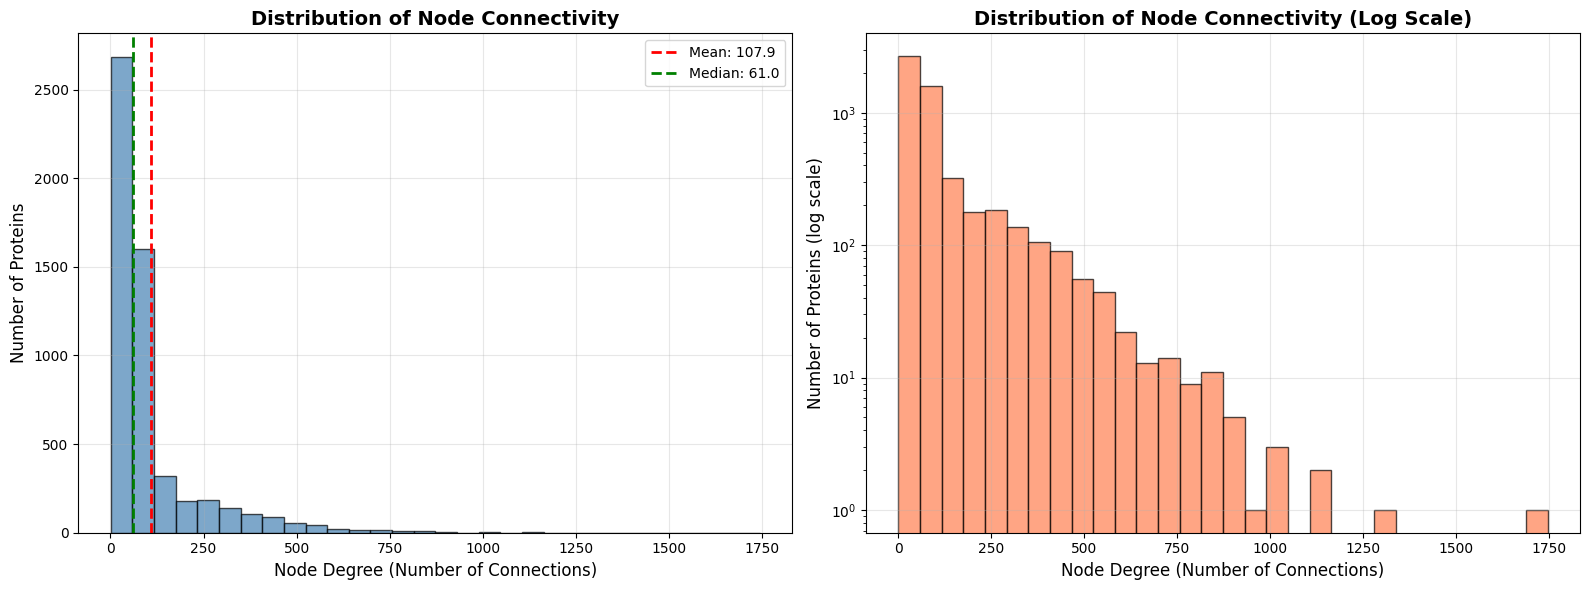

NODE CONNECTIVITY STATISTICS:
Total number of proteins: 5481
Total number of interactions: 295804
Average degree: 107.94
Median degree: 61.0
Min degree: 1
Max degree: 1745

TOP 10 MOST CONNECTED PROTEINS (HUBS):
Protein              Degree    
------------------------------
PA0928               1745      
PA0835               1305      
PA0576               1130      
PA0600               1106      
PA0399               1030      
PA0548               1019      
PA0552               994       
PA0766               976       
PA0782               923       
PA0546               906       

Proteins with only 1 connection: 50
Percentage of proteins with 1 connection: 0.9%


In [32]:
# Create the full network
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row['protein1'], row['protein2'])

# Get degree for each node
degrees = dict(G.degree())
degree_values = list(degrees.values())

# Create histogram
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Standard histogram
ax1 = axes[0]
counts, bins, patches = ax1.hist(degree_values, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
ax1.set_xlabel('Node Degree (Number of Connections)', fontsize=12)
ax1.set_ylabel('Number of Proteins', fontsize=12)
ax1.set_title('Distribution of Node Connectivity', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Add statistics
mean_degree = np.mean(degree_values)
median_degree = np.median(degree_values)
ax1.axvline(mean_degree, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_degree:.1f}')
ax1.axvline(median_degree, color='green', linestyle='--', linewidth=2, label=f'Median: {median_degree:.1f}')
ax1.legend()

# Log-scale histogram (useful for scale-free networks)
ax2 = axes[1]
ax2.hist(degree_values, bins=30, edgecolor='black', alpha=0.7, color='coral')
ax2.set_xlabel('Node Degree (Number of Connections)', fontsize=12)
ax2.set_ylabel('Number of Proteins (log scale)', fontsize=12)
ax2.set_title('Distribution of Node Connectivity (Log Scale)', fontsize=14, fontweight='bold')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print("="*60)
print("NODE CONNECTIVITY STATISTICS:")
print(f"Total number of proteins: {G.number_of_nodes()}")
print(f"Total number of interactions: {G.number_of_edges()}")
print(f"Average degree: {mean_degree:.2f}")
print(f"Median degree: {median_degree:.1f}")
print(f"Min degree: {min(degree_values)}")
print(f"Max degree: {max(degree_values)}")

# Top 10 most connected proteins (hubs)
sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
print("\n" + "="*60)
print("TOP 10 MOST CONNECTED PROTEINS (HUBS):")
print(f"{'Protein':<20} {'Degree':<10}")
print("-"*30)
for protein, degree in sorted_degrees[:10]:
    short_name = protein.split('.')[-1]
    print(f"{short_name:<20} {degree:<10}")

# Identify proteins with only 1 connection
single_connection = [node for node, degree in degrees.items() if degree == 1]
print("\n" + "="*60)
print(f"Proteins with only 1 connection: {len(single_connection)}")
print(f"Percentage of proteins with 1 connection: {len(single_connection)/G.number_of_nodes()*100:.1f}%")